# **Importing all the neccesary libraries**

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE DATASET USING PANDAS

In [36]:
dataset = pd.read_csv('data (5).csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **DATA PREPROCESSING**

In [3]:
dataset.shape

(918, 12)

In [4]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# **From above we can declare that**

**Binary columns: sex,ChestPainType ,RestingECG , ExerciseAngina, ST_Slope.**


**Int or Float columns: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak**


**Target column: HeartDisease**

In [8]:
dataset['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Text(0.5, 1.0, 'Value counts of yes or no on Heart Disease')

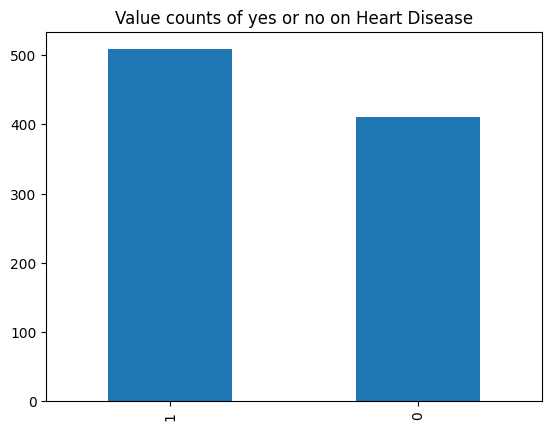

In [9]:
dataset['HeartDisease'].value_counts().plot.bar()
plt.title("Value counts of yes or no on Heart Disease")

In [10]:
bin_columns=['Sex','ChestPainType' ,'RestingECG' , 'ExerciseAngina', 'ST_Slope']

In [11]:
print("SEX column value counts: ")
print(dataset['Sex'].value_counts())
print()

print("ChestPainType column value counts: ")
print(dataset['ChestPainType'].value_counts())
print()

print("RestingECG column value counts: ")
print(dataset['RestingECG'].value_counts())
print()

print("ExerciseAngina column value counts: ")
print(dataset['ExerciseAngina'].value_counts())
print()

print("ST_Slope column value counts: ")
print(dataset['ST_Slope'].value_counts())
print()

SEX column value counts: 
M    725
F    193
Name: Sex, dtype: int64

ChestPainType column value counts: 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

RestingECG column value counts: 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

ExerciseAngina column value counts: 
N    547
Y    371
Name: ExerciseAngina, dtype: int64

ST_Slope column value counts: 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64



Text(0, 0.5, 'count of yes or no in datset')

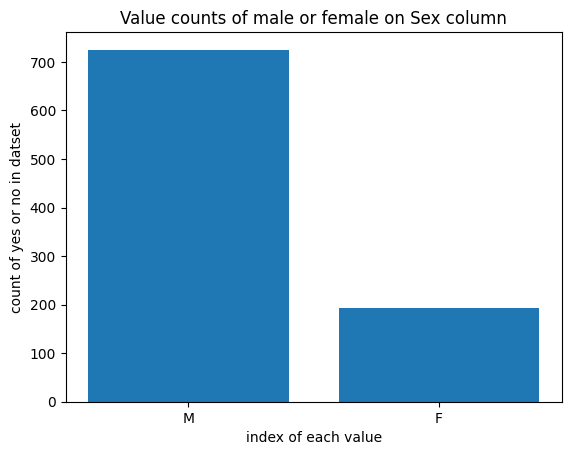

In [12]:
plt.bar(dataset['Sex'].value_counts().index,dataset['Sex'].value_counts())
plt.title("Value counts of male or female on Sex column")
plt.xlabel("index of each value")
plt.ylabel("count of yes or no in datset")

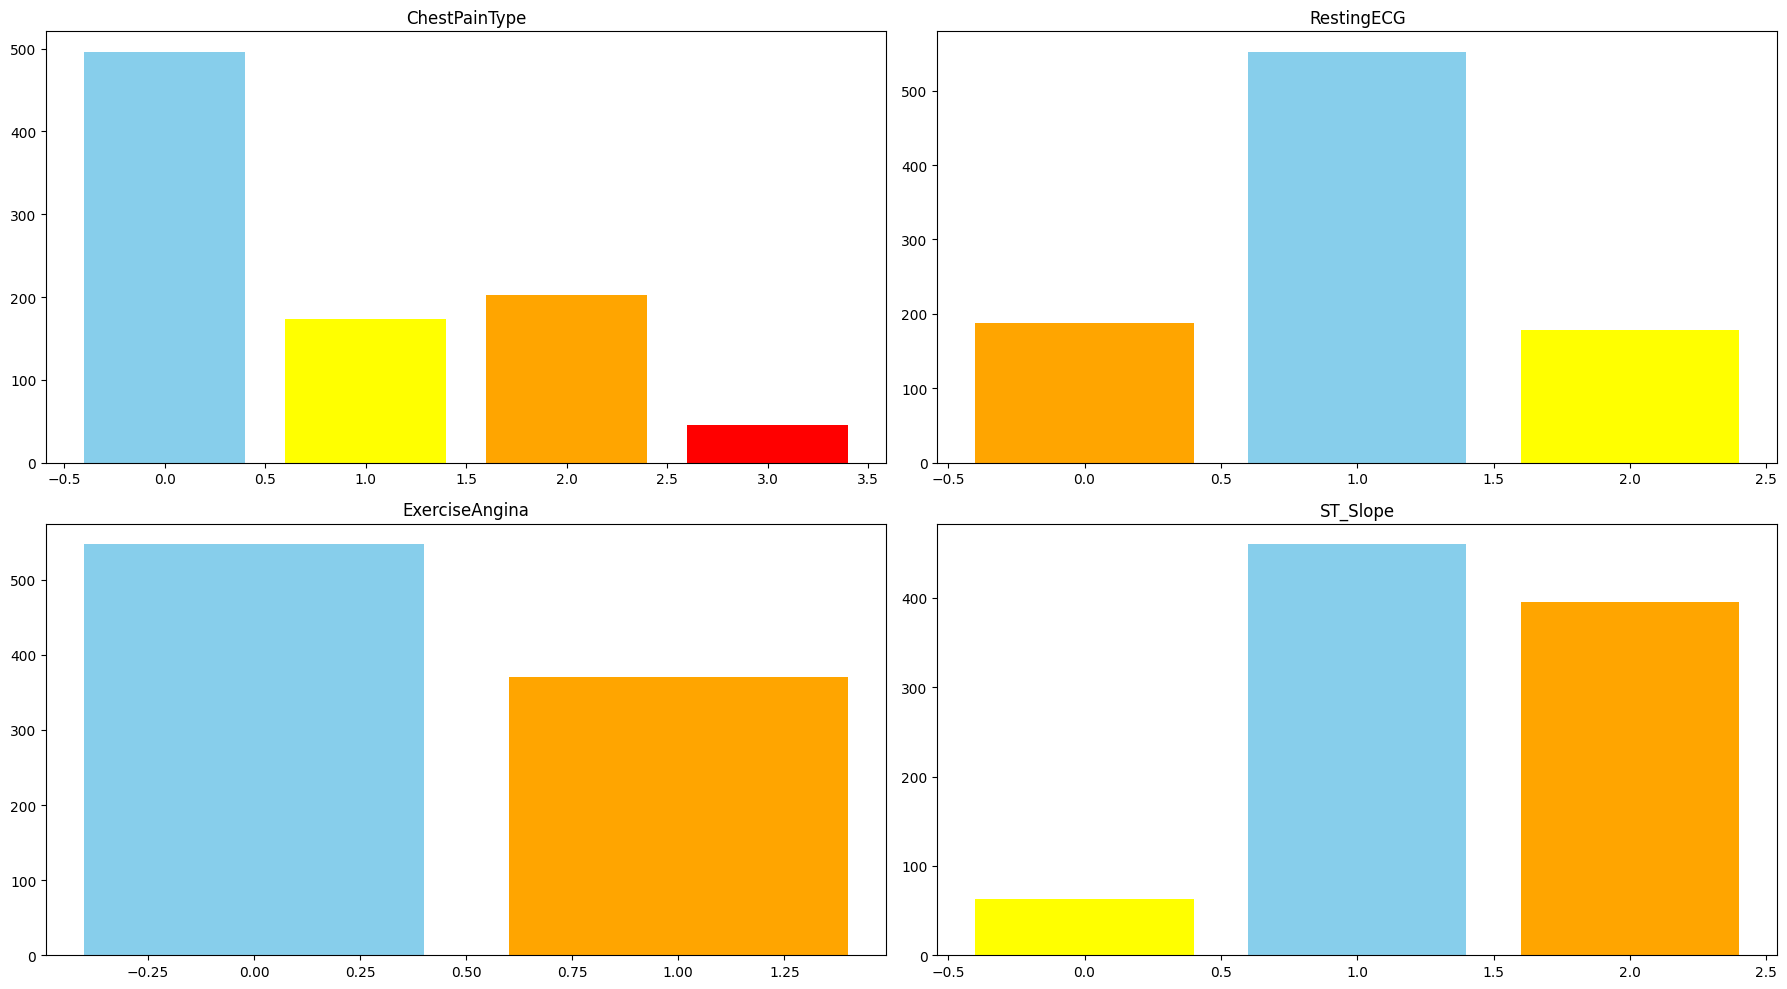

In [30]:
fig,ax=plt.subplots(2,2,figsize=(18,10))
colors=['skyblue','orange','yellow','red']
col=['ChestPainType' ,'RestingECG' , 'ExerciseAngina', 'ST_Slope']
for i, column in enumerate(col):
    row_index = i // 2
    col_index = i % 2
    current_ax = ax[row_index, col_index]
    ax[row_index][col_index].bar(dataset[column].value_counts().index,dataset[column].value_counts(),color=colors)
    current_ax.set_title(column)
plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
for i in bin_columns:
  dataset[i]=le.fit_transform(dataset[i])

In [39]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [17]:
dataset.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


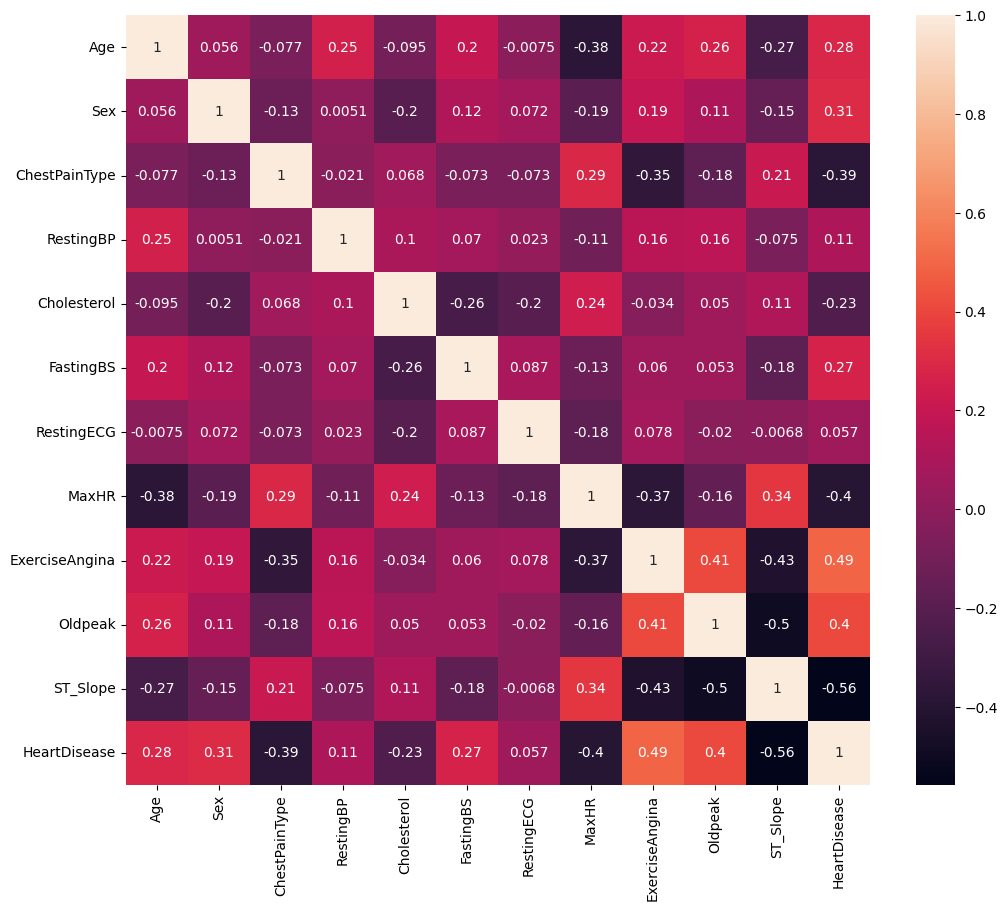

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

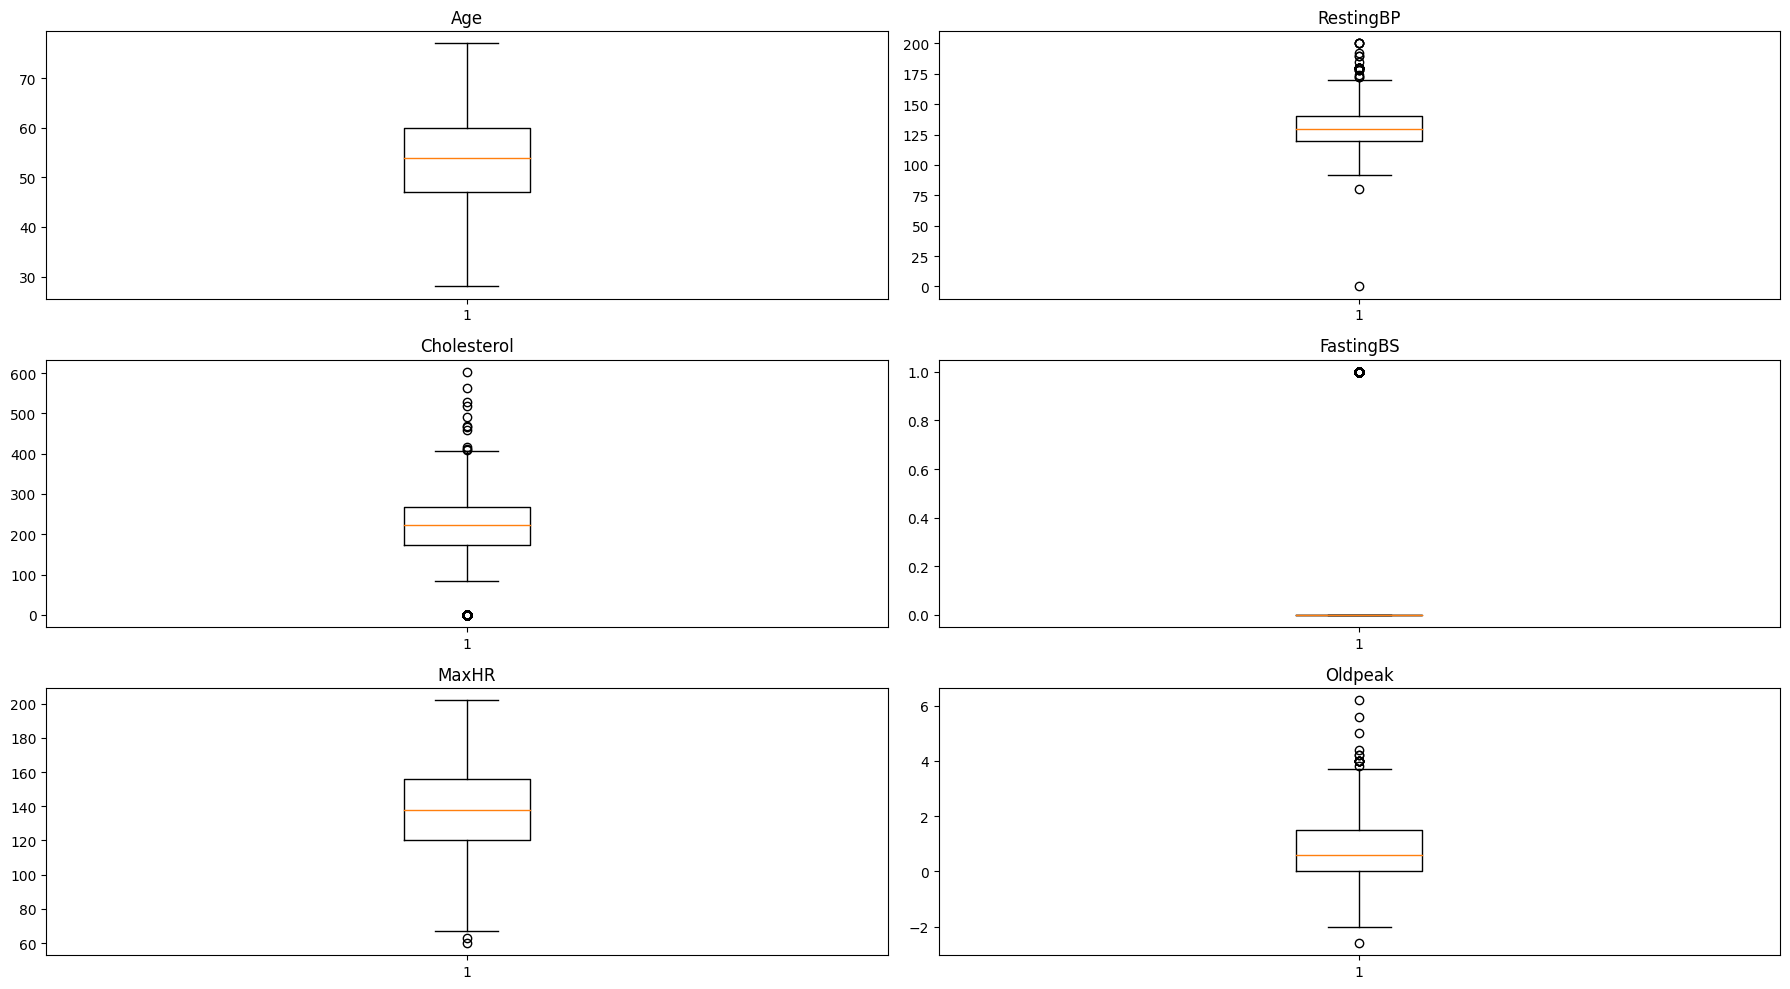

In [19]:
cols=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
fig,ax=plt.subplots(3,2,figsize=(18,10))
for i, column in enumerate(cols):
    row_index = i // 2
    col_index = i % 2
    current_ax = ax[row_index, col_index]
    ax[row_index][col_index].boxplot(dataset[column])
    current_ax.set_title(column)
plt.tight_layout()
plt.show()

In [20]:
val_col=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
print(val_col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [40]:
dataset.drop("MaxHR",axis=1,inplace=True)

In [43]:
X = dataset.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [24]:
pipe = Pipeline(steps=[
    ('step1',StandardScaler()),
    ('step2',SVC(kernel = 'linear', random_state = 0))
])

In [25]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66 11]
 [18 89]]


0.842391304347826

In [32]:
from sklearn.neighbors import KNeighborsClassifier
pipe1 = Pipeline(steps=[
    ('step1',StandardScaler()),
    ('step2',KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2))
])

In [33]:
pipe1.fit(X_train,y_train)
y_pred = pipe1.predict(X_test)

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[68  9]
 [20 87]]


0.842391304347826

In [35]:
import pickle
pickle.dump(pipe1,open('Disease_prediction.pkl','wb'))